In [102]:
import random
from typing import List, Optional, Dict
from itertools import product
from collections import namedtuple, defaultdict

import matplotlib.pyplot as plt

%matplotlib inline

In [103]:
inf = float("inf")
Node = namedtuple("Node", ("x", "y"))


class World:
    
    def __init__(self, size: int, alpha: float = 0.05, seed: int = 0):
        
        random.seed(seed)
        self.size = size
        self.data = [
            [random.random() > alpha for _ in range(size)] for _ in range(size)
        ]
        
    def __getitem__(self, node: Node) -> bool:
        
        if 0 <= node.x < self.size and 0 <= node.y < self.size:
            return self.data[node.x][node.y]
        
        return False
    
    def get_neighbors_of(self, node: Node) -> List[Node]:
        neighbors = []
        for dx, dy in ((0, 1), (0, -1), (1, 0), (-1, 0)):
            candidate = Node(node.x + dx, node.y + dy)
            
            if self[candidate]:
                neighbors.append(candidate)
                
        return neighbors
    
    def show(self, path: Optional[List[Node]] = None):
        
        plot_data = [
            [
                (255, 255, 255) if val else (0, 0, 0)
                for val in row
            ]
            for row in self.data
        ]
        
        if path:
            for node in path:
                plot_data[node.x][node.y] = (255, 0, 0)

        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
        ax.imshow(plot_data, cmap="gray")
        plt.show()

In [128]:
def a_star(start: Node, goal: Node, world: World) -> Optional[List[Node]]:
    
    def h(n):
        return (n.x - goal.x) + (n.y - goal.y)

    def reconstruct_path(came_from, current):
        path = [current]      
        while current in came_from:
            current = came_from[current]
            path = [current] + path

        return path

    open_set = {start}
    came_from = {}
    g_score = defaultdict(lambda: inf)
    g_score[start] = 0
    
    # f(n) = g(n) + h(n)
    f_score = defaultdict(lambda: inf)
    f_score[start] = h(start)
    
    while open_set:
        # node in open_set with the lowest f-score
        current = min(open_set, key=lambda n: f_score[n])
        
        if current == goal:
            return reconstruct_path(came_from, current)
        
        open_set.remove(current)
        for neighbor in world.get_neighbors_of(current):
            # d(current, neighbor) = 1 for any current, neighbor
            tentative_g_score = g_score[current] + 1
            if tentative_g_score < g_score[neighbor]:
                # this past to the neighbor is the cheapest so far
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + h(neighbor)
                
                if neighbor not in open_set:
                    open_set.add(neighbor)
                    
    return None

In [129]:
world = World(size=50, seed=0, alpha=0.1)
path = a_star(start=Node(0, 0), goal=Node(49, 49), world=world)

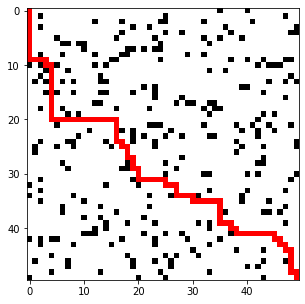

In [130]:
world.show(path)